In [1]:
from city_tasks_assignment.classes import Problem
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time

In [2]:
SAVE_PLOTS = False
DPI = 500

## Benchmarks of ilp_optimize

In [3]:
times = []

for tasks in range(4,11):
    print(tasks)

    for _ in range(5):
        problem = Problem()
        problem.create_random(tasks, 2, 2, 2)
        st = time()
        problem.ilp_optimize()
        times.append((tasks, time() - st))



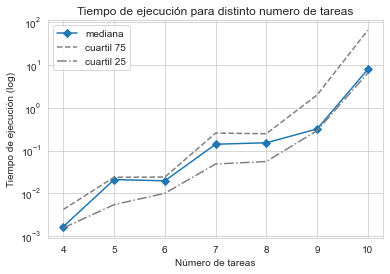

In [4]:
arr = np.array(list(zip(*times))[1]).reshape(7,5)

plt.yscale('log')
plt.plot(list(range(4,11)), np.quantile(arr, 0.5, axis=1) , 'D-', label='mediana')
plt.plot(list(range(4,11)), np.quantile(arr, 0.75, axis=1), '--', color='grey', label='cuartil 75')
plt.plot(list(range(4,11)), np.quantile(arr, 0.25, axis=1), '-.', color='grey', label='cuartil 25')
plt.xlabel('Número de tareas')
plt.ylabel('Tiempo de ejecución (log)')
plt.title('Tiempo de ejecución para distinto numero de tareas')
plt.legend()

if SAVE_PLOTS:
    plt.savefig('plots/v2.png', dpi=DPI)
else:
    plt.show()

## Comparaison between sa_optimize and ilp_optimize

In [5]:
# Create random problem. Results may vary with different problems.

problem = Problem()
problem.create_random(11, 2, 2, 2)

In [6]:
its = 10 # How many times to optimize

In [7]:
# Comparaison

ilp_times = np.empty((its, ))
ilp_fss = np.empty((its,))

sa_times = np.empty((its,))
sa_fss = np.empty((its,))

for i in range(its):
    st = time()
    ilp_fss[i], ls = problem.ilp_optimize()
    ilp_times[i] = time() - st
    
    st = time()
    sa_fss[i], _, fss = problem.sa_optimize(ini_tasks_to_rearrange=5)
    sa_times[i] = time() - st

In [8]:
ls = list(zip([ilp_fss[0], 0],
              [np.mean(ilp_times), np.std(ilp_times)],
              [np.mean(sa_fss), np.std(sa_fss)],
              [np.mean(sa_times), np.std(sa_times)]))

df = pd.DataFrame(ls, index=['mean', 'std'], columns=['ilp_fitness', 'ilp_times', 'sa_fitness', 'sa_times'])
df

,ilp_fitness,ilp_times,sa_fitness,sa_times
mean,11.940551,18.908027,12.189108,0.232017
std,0.000000,2.509626,0.721901,0.014834


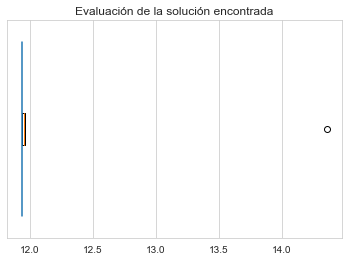

In [10]:
plt.boxplot(sa_fss, vert=False)
_, _, ym, yM = plt.axis()
plt.plot([ilp_fss[0], ilp_fss[0]], [ym + .1, yM -.1])
plt.yticks([])
plt.title('Evaluación de la solución encontrada')

if SAVE_PLOTS:
    plt.savefig("plots/boxplot.png", dpi=DPI)
else:
    plt.show()

## Comparaison between different rearangement methods

In [11]:
# Create random problem with 99 tasks

p1 = Problem()
p1.create_random(100, 5, n_days=5)

In [12]:
inter = p1.sa_optimize(rearrange_opt=0)[-1]
op = p1.sa_optimize(rearrange_opt=1)[-1]
perm = p1.sa_optimize(rearrange_opt=2)[-1]
pegar = p1.sa_optimize(rearrange_opt=3)[-1]
remute = p1.sa_optimize(rearrange_opt=4)[-1]

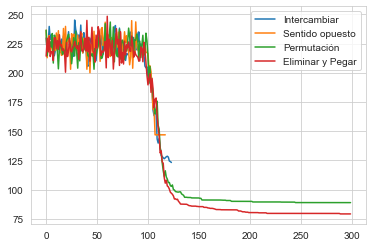

In [13]:
plt.plot(inter, label='Intercambiar')
plt.plot(op + [op[-1]] * 10, label='Sentido opuesto')
plt.plot(perm, label='Permutación')
plt.plot(pegar, label='Eliminar y Pegar')
plt.legend()

if SAVE_PLOTS:
    plt.savefig("plots/comp_reorg.png", dpi=DPI)
else:
    plt.show()

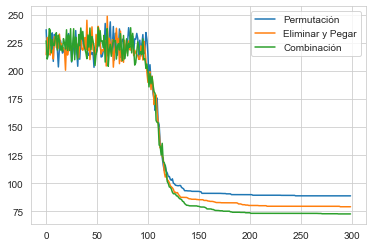

In [14]:
plt.plot(perm, label='Permutación')
plt.plot(pegar, label='Eliminar y Pegar')
plt.plot(remute, label='Combinación')
plt.legend()

if SAVE_PLOTS:
    plt.savefig("plots/comp_reorg_selection.png", dpi=DPI)
else:
    plt.show()

## Montecarlo simulations for the multiobjective problem.

In [15]:
problem = Problem(file_name='cities/Oldenburg', directed=False)

In [16]:
# Multi-objective parameters
ls = problem.monte_carlo_simulation_MO("MC_Sim/MO.txt", 40, 10000, its=100, print_conf=False)

    To plot the pareto frontier:

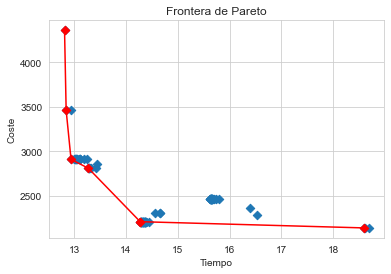

In [17]:
problem.plot_MO_pareto(ls, savefig=SAVE_PLOTS, dpi=DPI, filename='plots/MC_MO_pareto.png')

    To find out how diferent weights affect the objectives:

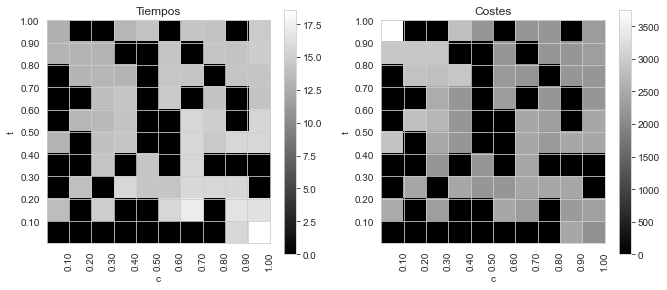

In [18]:
problem.plot_MO(ls, 10, savefig=SAVE_PLOTS, dpi=DPI, filename='plots/MC_MO.png')